In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data/user-item-interaction.csv")

df.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


# Clean Data

## Remove NA and duplicateds values

In [7]:
df.dropna(
    subset=['event_time', 'order_id', 'product_id', 'category_id', 'price', 'user_id'],
    inplace=True
)
df.dtypes

print(df.order_id.duplicated().sum())
df.drop_duplicates('order_id', inplace=True)



0


In [8]:
# Transform product_id and user_id to sequential values
df['product_id'] = df['product_id'].rank(method='dense', ascending=False).astype(int)
df['user_id'] = df['user_id'].rank(method='dense', ascending=False).astype(int)
df['category_id'] = df['category_id'].rank(method='dense', ascending=False).astype(int)

df

(389709, 8)
(17928,)
(98167,)


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,17388,483,electronics.tablet,samsung,162.01,95522
2,2020-04-24 14:37:43 UTC,2294444024058086220,2809,452,electronics.audio.headphone,huawei,77.52,86733
4,2020-04-24 19:16:21 UTC,2294584263154074236,2880,186,NaN,karcher,217.57,93185
5,2020-04-26 08:45:57 UTC,2295716521449619559,13772,368,furniture.kitchen.table,maestro,39.33,83159
6,2020-04-26 09:33:47 UTC,2295740594749702229,16852,468,electronics.smartphone,apple,1387.01,85502
...,...,...,...,...,...,...,...,...
2633513,2020-11-21 10:08:14 UTC,2388440981134693940,4370,630,NaN,xiaomi,16.18,56841
2633514,2020-11-21 10:08:54 UTC,2388440981134693941,6938,2,electronics.video.tv,samsung,1736.09,1846
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,6482,468,electronics.smartphone,oppo,138.87,3
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,17743,468,electronics.smartphone,apple,418.96,1


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

In [9]:
df["user_id"].value_counts().describe()

count    98167.000000
mean         3.969857
std         15.301643
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        374.000000
Name: user_id, dtype: float64

<AxesSubplot:>

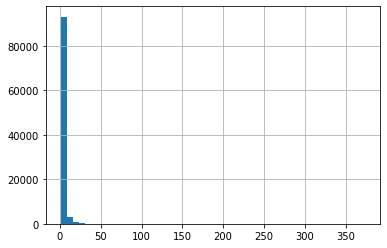

In [10]:
df["user_id"].value_counts().hist(bins = 50)

In [12]:
print(f"Produtos Cadastrados {df['product_id'].unique().shape[0]}")
print(f"Usuários unicos {df['user_id'].value_counts().shape[0]}")
print(f"Total de compras feitas desses produtos por esses usuários {df.shape[0]}")

Produtos Cadastrados 17928
Usuários unicos 98167
Total de compras feitas desses produtos por esses usuários 389709


In [15]:
# Produtos mais comprados
most_boughts = df.product_id.value_counts().index.to_list()[:5]

print(most_boughts)
df.loc[df.product_id.isin(most_boughts)].drop_duplicates(['product_id'])

[17879, 7042, 16504, 17868, 17900]


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
49,2020-04-29 12:25:34 UTC,2298001389550305634,17868,452,electronics.audio.headphone,apple,203.68,80551
129,2020-04-29 14:41:04 UTC,2298069587549225098,17900,468,electronics.smartphone,samsung,300.90,80472
318,2020-04-30 04:06:15 UTC,2298474845135962168,17879,468,electronics.smartphone,apple,856.23,91821
1172,2020-05-01 10:18:35 UTC,2299387029173043592,16504,468,electronics.smartphone,samsung,138.87,94118
27240,2020-06-22 15:57:45 UTC,2337246072499339490,7042,468,electronics.smartphone,samsung,173.59,50456


In [16]:
# Marca mais comprada
brand_most_boughts = df.brand.value_counts()[:5]

print(brand_most_boughts)

samsung    71919
apple      32222
ava        18101
xiaomi     12438
lg         12041
Name: brand, dtype: int64


In [17]:
#Categoria mais comprada

category_most_boughts = df.category_code.value_counts()[:5]

print(category_most_boughts)

electronics.smartphone              84474
computers.notebook                  21072
appliances.kitchen.refrigerators    15087
electronics.audio.headphone         14734
electronics.video.tv                12783
Name: category_code, dtype: int64


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>


## Most bougth products

In [18]:
def get_top_product_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top products to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_products - (list) A list of the top 'n' product titles 
    '''
    
    
    top_products_ids = df.product_id.value_counts().head(n).index.to_list()
    
    return top_products_ids 

def get_top_products(n, df=df):
    '''
    INPUT:
    n - (int) the number of top products to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_products - (list) A list of the top 'n' product titles 
    '''
    
    top_products_ids = get_top_product_ids(n, df)
    
    top_products = [
        df.loc[df.product_id == i].iloc[0][["product_id","category_code", "brand"]].values.tolist()
        for i in top_products_ids
    ]
    
    return top_products

In [19]:
print(get_top_product_ids(10))
get_top_products(10)

[17879, 7042, 16504, 17868, 17900, 17119, 10561, 17908, 17864, 17852]


[[17879, 'electronics.smartphone', 'apple'],
 [7042, 'electronics.smartphone', 'samsung'],
 [16504, 'electronics.smartphone', 'samsung'],
 [17868, 'electronics.audio.headphone', 'apple'],
 [17900, 'electronics.smartphone', 'samsung'],
 [17119, 'electronics.smartphone', 'samsung'],
 [10561, 'electronics.smartphone', 'samsung'],
 [17908, 'electronics.smartphone', 'samsung'],
 [17864, 'appliances.environment.air_conditioner', 'ava'],
 [17852, 'electronics.smartphone', 'samsung']]

### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


In [20]:
print(f"Produtos Cadastrados {df['product_id'].unique().shape[0]}")
print(f"Usuários unicos {df['user_id'].value_counts().shape[0]}")

Produtos Cadastrados 17928
Usuários unicos 98167


## Reduce dataset size

In consequency of memory issues we need to reduce our df size for matrix operations. so for that we use only last month data.

In [27]:
dfm = df.user_id.value_counts().reset_index(name="count").query("count > 5")["index"].tolist()


dfm = df.loc[df.user_id.isin(dfm)]

# TODO: Use sparse matrix to dont miss data

In [29]:
print(f"Total products in df {df['product_id'].unique().shape[0]}")
print(f"Total users in df {df['user_id'].value_counts().shape[0]}")
print(f"Total products in dfm {dfm['product_id'].unique().shape[0]}")
print(f"Total users in dfm {dfm['user_id'].value_counts().shape[0]}")

Total products in df 17928
Total users in df 98167
Total products in dfm 14712
Total users in dfm 10851


In [18]:
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,20416,517,electronics.tablet,samsung,162.01,95615
1,2020-04-24 11:50:39 UTC,2294359932054536986,20416,517,electronics.tablet,samsung,162.01,95615
2,2020-04-24 14:37:43 UTC,2294444024058086220,4044,485,electronics.audio.headphone,huawei,77.52,86814
3,2020-04-24 14:37:43 UTC,2294444024058086220,4044,485,electronics.audio.headphone,huawei,77.52,86814
4,2020-04-24 19:16:21 UTC,2294584263154074236,4126,211,NaN,karcher,217.57,93275
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,8230,501,electronics.smartphone,oppo,138.87,3
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,20777,501,electronics.smartphone,apple,418.96,1
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,20411,725,appliances.personal.scales,vitek,12.48,72
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,7529,419,NaN,moulinex,41.64,72


In [30]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(dfm):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    
    user_item = dfm.groupby(['user_id', 'product_id'])['category_id'].count().unstack().notnull().astype(int) 
    
    return user_item  

user_item = create_user_item_matrix(dfm)

In [72]:
df.groupby('user_id', as_index=False).agg({'product_id': list})

,user_id,product_id
0,1,[17743]
1,2,[17829]
2,3,"[6482, 8190, 6482]"
3,4,[17417]
4,5,[10561]
...,...,...
98162,98163,"[17537, 17864]"
98163,98164,"[17787, 12184, 14615, 17881, 6377, 7257, 7849,..."
98164,98165,"[2410, 17089, 1507, 1507, 3148]"
98165,98166,"[5025, 6862]"


# TODO if user does not exist, put it in the matrice.

In [32]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    similarity = user_item.dot(user_item.loc[user_id])
    
    # sort by similarity
    similarity = similarity.sort_values(ascending=False)
    # create list of just the ids
    most_similar_users = similarity.index.to_list()
    # remove the own user's id
    most_similar_users.remove(user_id)
    
    return most_similar_users # return a list of the users in order from most to least similar
        

In [33]:
find_similar_users(45)[:10]

[4800, 3490, 4413, 241, 1261, 4099, 5412, 15359, 5413, 3493]

Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend. Complete the functions below to return the articles you would recommend to each user.

In [34]:
def get_product_names(product_ids, df=df):
    '''
    INPUT:
    product_ids - (list) a list of product ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    product_names - (list) a list of product names associated with the list of product ids 
                    (this is identified by the title column)
    '''
    
    product_names = [df.loc[
        df.product_id == float(i)].iloc[0][["product_id","category_code", "brand"]].values.tolist() 
        for i in product_ids
    ]
    
    return product_names 


def get_user_products(user_id, df=df):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by products: 
                1's when a user has interacted with an product, 0 otherwise
    
    OUTPUT:
    product_ids - (list) a list of the product ids seen by the user
    product_names - (list) a list of product names associated with the list of product ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the product_ids and product titles that have been seen by a user
    '''
    user_products = df.loc[df.user_id == user_id]["product_id"].values.tolist()          
    product_names = get_product_names(user_products)
    
    return user_products, product_names # return the ids and names

In [35]:
get_user_products(1)

([17743], [[17743, 'electronics.smartphone', 'apple']])

In [36]:
def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds products the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended products starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    
    similar_users = find_similar_users(user_id)
    
    user_product_ids, user_product_names = get_user_products(user_id)
    
    recs = []
    for user in similar_users:
        product_ids, product_names = get_user_products(user)
        
        for i in product_ids:
            if(i not in user_product_ids and i not in recs):
                recs.append(i)
                if len(recs) >= m:
                    return recs
                
    return recs # return your recommendations for this user_id    

In [37]:
get_product_names(user_user_recs(45, 10))

[[5742, nan, 'svc'],
 [6626, 'electronics.smartphone', 'samsung'],
 [968, 'computers.notebook', 'asus'],
 [12929, 'computers.notebook', 'legrand'],
 [15982, 'appliances.kitchen.kettle', 'tefal'],
 [5716, nan, 'filtero'],
 [12022, 'appliances.iron', 'vitek'],
 [17646, 'computers.network.router', 'tp-link'],
 [5059, 'appliances.environment.vacuum', 'samsung'],
 [5472, nan, 'nika']]

Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer product interactions.

Instead of arbitrarily choosing products from the user where the number of recommended products starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be what would be obtained from the top_articles function you wrote earlier.

In [38]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by products: 
            1's when a user has interacted with an product, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of products viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    similarity = user_item.dot(user_item.loc[user_id])
    
    neighbors_df = pd.DataFrame({"neighbor_id": similarity.index.to_list(), 
                                 "similarity": similarity.to_list(),
                                 "num_interactions": [user_item.loc[i].sum() for i in similarity.index.to_list()]
                                })
    neighbors_df.sort_values(by = ['similarity', 'num_interactions'], ascending = [False, True], inplace=True)
    
    neighbors_df.drop(neighbors_df.index[neighbors_df['neighbor_id'] == user_id], inplace=True)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by product id
    rec_names - (list) a list of recommendations for the user by product title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds products the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total product interactions 
    before choosing those with fewer product interactions.

    * Choose products with the products with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    
    top_sorted_users = get_top_sorted_users(user_id)
    
    similar_users = find_similar_users(user_id)
    
    user_product_ids, user_product_names = get_user_products(user_id)
    
    recs = []
    for user in similar_users:
        product_ids, product_names = get_user_products(user)
        
        for i in product_ids:
            if(i not in user_product_ids and i not in recs):
                recs.append(i)
                if len(recs) >= m:       
                    return recs, get_product_names(recs)
                 
    return recs, get_product_names(recs)

In [39]:
rec_ids, rec_names = user_user_recs_part2(40895, 10)
print("The top 10 recommendations for user 40895 are the following product ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 40895 are the following products names:")
print(rec_names)

The top 10 recommendations for user 40895 are the following product ids:
[4277, 9706, 17264, 5661, 13785, 17843, 15714, 13372, 11028, 15587]

The top 10 recommendations for user 40895 are the following products names:
[[4277, nan, 'pasabahce'], [9706, nan, 'remington'], [17264, nan, 'jbl'], [5661, nan, 'pocketbook'], [13785, nan, 'akvafor'], [17843, 'electronics.audio.acoustic', 'jbl'], [15714, 'computers.network.router', 'tp-link'], [13372, 'appliances.environment.vacuum', 'ozone'], [11028, nan, 'lavazza'], [15587, 'computers.peripherals.keyboard', nan]]


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations</a>

### Category based recommendation

Maybe it's not a good choice, because when a user buys an eletronic it will take a while when the users will have to buy it again

Maybe it's is not a good option, because when user buy a 

In [40]:
def get_product_frequent_category(products_ids, min_influency=.1 , df=df):
    
    # get bougths products
    products = df[df.product_id.isin(list(map(int,products_ids)))].drop_duplicates("category_code") 
    
    # show categorys that represents at least min_influency % of all purchases
    
    top_categories = products['category_code'].value_counts(normalize=True)[
        products['category_code'].value_counts(normalize=True) >= min_influency
    ]
    
    print(top_categories)
    user_top_categories = top_categories.index.to_list()
    return user_top_categories

def category_based_recs(user_id, m=10, df=df):
    '''
    Args:
        user_id (bool) - if true, make recs based on user
        m (int) - number of recommendations to give based on term
    Returns:
        recs (list) - list of product ids that are recommended
        rec_names (list) - list of product names that are recommended   
        
        
    Description:
        Recommened products based on user most consumed product styles
    '''
    
    product_ids, _ = get_user_products(user_id)  
    
    user_top_categories = get_product_frequent_category(product_ids)
    
    
    top_products_ids = get_top_product_ids(df.shape[0])
    
    prefered_category_product = df.loc[df['category_code'].isin(user_top_categories)]
        
    top_recs_by_category = []
    
    
    #Map products id to int to use in for if's
    product_ids = map(int, product_ids)
    for i in top_products_ids:
        if len(top_recs_by_category) > m: break
            
        if (i in prefered_category_product['product_id'].values and i not in product_ids):
            top_recs_by_category.append(i)
            

    rec_names = get_product_names(top_recs_by_category)
    
    return top_recs_by_category, rec_names

In [42]:
ids, names = category_based_recs(1, m = 15)

names


electronics.smartphone    1.0
Name: category_code, dtype: float64


[[17879, 'electronics.smartphone', 'apple'],
 [7042, 'electronics.smartphone', 'samsung'],
 [16504, 'electronics.smartphone', 'samsung'],
 [17900, 'electronics.smartphone', 'samsung'],
 [17119, 'electronics.smartphone', 'samsung'],
 [10561, 'electronics.smartphone', 'samsung'],
 [17908, 'electronics.smartphone', 'samsung'],
 [17852, 'electronics.smartphone', 'samsung'],
 [17829, 'electronics.smartphone', 'apple'],
 [17615, 'electronics.smartphone', 'samsung'],
 [17858, 'electronics.smartphone', 'samsung'],
 [11743, 'electronics.smartphone', 'apple'],
 [17816, 'electronics.smartphone', 'samsung'],
 [17870, 'electronics.smartphone', 'samsung'],
 [17056, 'electronics.smartphone', 'samsung'],
 [17670, 'electronics.smartphone', 'apple']]

### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In [58]:
train_X = df.sample(frac = 0.7)
test_X = df.drop(train.index)

print(df.shape)
print(train_X.shape)
print(test_X.shape)

(389709, 8)
(272796, 8)
(116913, 8)


In [78]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection.validation import cross_validate
from sklearn.model_selection import train_test_split as  train_test_split_sklearn

In [79]:
def build_data_set(df_train):
    df_prod_user = (df_train[['product_id','user_id']]).copy()
    df_prod_user = df_prod_user.groupby(df_prod_user.columns.tolist(),as_index=False).size()
    df_prod_user.rename(columns={'size': 'rating'}, inplace=True)
    df_prod_user['rating'] = df_prod_user['rating'].apply(lambda x: x+1 if x < 3 else 4)
    
    df_prod = df_train['product_id'].drop_duplicates().sample(frac=.75)
    df_user = df_train['user_id'].drop_duplicates().sample(frac=.75)

    data_zero = pd.DataFrame(columns=['product_id','user_id'])
    data_zero['product_id'] = df_prod.copy()
    data_zero = pd.concat([data_zero, data_zero])
    data_zero = pd.concat([data_zero, data_zero])
    data_zero['user_id'] = data_zero['user_id'].apply(lambda x: df_user.sample().iloc[0])
    df = df_prod_user[['product_id','user_id']].copy()
    df_merge = pd.merge(data_zero,df)
    
    data_zero = data_zero[data_zero.product_id.isin(df_merge['product_id'].tolist()) == False]
    data_zero['rating'] = 1
    
    data_single = df_prod_user[df_prod_user['rating']==2].reset_index(drop= True)
    data_double = df_prod_user[df_prod_user['rating']==3].reset_index(drop= True)
    data_multiple = df_prod_user[df_prod_user['rating']==4].reset_index(drop= True)

    data_zero_train = data_zero.sample(int(0.33*(data_double.shape[0] + data_multiple.shape[0])))
    data_single_train, data_single_test = train_test_split_sklearn(data_single, train_size= 0.50)
    
    data_tuning = pd.concat([data_multiple, data_double, data_single_train, data_zero_train]).sort_values(by = 'rating').reset_index(drop=True)

    print('\nTraining Data:')
    print('Zero Purchases:.........', data_tuning[data_tuning['rating']==1].shape[0])
    print('Single Purchase:........', data_tuning[data_tuning['rating']==2].shape[0])
    print('Double Purchases:.......', data_tuning[data_tuning['rating']==3].shape[0])
    print('Multiple (3+) Purchases:', data_tuning[data_tuning['rating']==4].shape[0])
    print('Total Data Points:......', data_tuning.shape[0],'\n')
    
    return data_tuning

In [81]:
# SVD Prediction Algorithm
svd = SVD()
data_tuning = build_data_set(train_X)

reader = Reader(rating_scale=(1, 4))
data = Dataset.load_from_df(data_tuning, reader)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
trainset = data.build_full_trainset()
svd.fit(trainset)


Training Data:
Zero Purchases:......... 6727
Single Purchase:........ 111461
Double Purchases:....... 15405
Multiple (3+) Purchases: 4981
Total Data Points:...... 138574 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5225  0.5307  0.5246  0.5293  0.5254  0.5265  0.0030  
MAE (testset)     0.3442  0.3477  0.3434  0.3480  0.3438  0.3454  0.0020  
Fit time          4.15    4.28    4.36    4.32    4.29    4.28    0.07    
Test time         0.11    0.11    0.11    0.11    0.11    0.11    0.00    


In [83]:
def rating_validation(df_valid,svd):
    df_purchases = df_valid.copy()
    df_purchases['SVD_rating'] = float(0)
    df_purchases['Deviation'] = float(0)

    for i,row in df_purchases.iterrows():
        p = row['product_id']
        u = row['user_id']
        SVDr = svd.predict(p,u).est
        d = abs(SVDr - float(row['rating']))
        if d < 0.01: d = 0
        df_purchases.at[i,'SVD_rating'] = SVDr
        df_purchases.at[i,'Deviation'] = d
    
    predictions = df_purchases[df_purchases['SVD_rating'] >= 2].shape[0]
    success = predictions * 100 / df_purchases['SVD_rating'].shape[0]
    
    print('\nPercent rated 2+:',format(success,'.2f'),'%')
    
    lt50 = df_purchases.loc[df_purchases['Deviation'] <= 0.50].shape[0]
    lt25 = df_purchases.loc[df_purchases['Deviation'] <= 0.25].shape[0]
    lt10 = df_purchases.loc[df_purchases['Deviation'] <= 0.10].shape[0]
    total = df_purchases.shape[0]
    print('Precent within +/-0.10:', format(100*lt10/total,'.2f'),'%')
    print('Precent within +/-0.25:', format(100*lt25/total,'.2f'),'%')
    print('Precent within +/-0.50:', format(100*lt50/total,'.2f'),'%')
    
    return df_purchases

In [85]:
df_purchases = rating_validation(test_X, svd)

KeyError: 'rating'

In [ ]:
u, s, vt = np.linalg.svd(user_item, full_matrices=False) # use the built in to get the three matrices

s.shape, u.shape, vt.shape

In [27]:
user_item

product_id,1,2,3,4,5,6,7,8,9,10,...,20950,20951,20954,20955,20957,20958,20960,20961,20962,20964
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
